In [1]:
from imu.raw_dataset import IMUHumanEventDatabase

# - Data processing
import numpy as np

# - Plotting and config
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.6, 3.6]
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.size"] = 12

# - Import modules
from rockpool.devices.xylo.imu.preprocessing import Quantizer

# Get the data

In [2]:
imu_db = IMUHumanEventDatabase(device_id="00")
train_set = imu_db.train_set
val_set = imu_db.val_set
test_set = imu_db.test_set

## Plot some raw samples

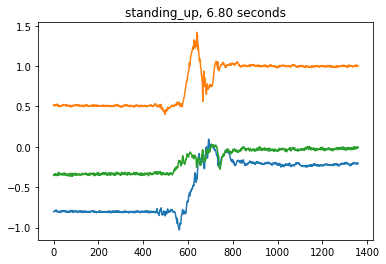

In [3]:
data, label, duration = train_set[0]
reverse_map = {v:k for k,v in train_set.label_map.items()}
plt.figure()
plt.plot(data)
plt.title(f"{reverse_map[label]}, {duration:.2f} seconds")
plt.show()

In [4]:
data.shape

(1360, 3)

## Step 1 : Quantize the data

Scale is obtained by investigating the dataset statistics. The maximum amplitude = 1.0 using scale factor=`0.49`

In [5]:
quantizer = Quantizer(shape=3, scale=0.49, num_bits=16)

In [6]:
data_quantized, _, _ = quantizer(data)

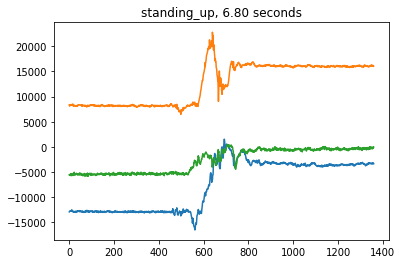

In [8]:
plt.figure()
plt.plot(data_quantized[0])
plt.title(f"{reverse_map[label]}, {duration:.2f} seconds")
plt.show()